In [135]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import seaborn as sns
import torch as th
import matplotlib.pyplot as plt
from aimanager.utils.utils import make_dir
from aimanager.utils.merge import merge_files_by_name

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})


run = 'dev'

base_folder = f'../../data/manager/simulate_rule/v2/{run}'

filename = os.path.join(base_folder, 'data', 'metrics.parquet')

plot_folder = f'plots/{run}'

make_dir(plot_folder)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [136]:
def _plot_heatmap(data, x, y, values, normalise=True):
    dfg = data.groupby([x,y])[values].sum()
    dfg = dfg.reset_index()
    if normalise:
        dfg[values] = dfg[values] / dfg.groupby([x])[values].transform('sum')
    cm = dfg.pivot_table(index=x, columns=y, values=values)
    cm = cm.sort_index(ascending=False)
    sns.heatmap(cm)

In [137]:
file_names = ['trace.csv']


df = pd.read_parquet(filename)


In [138]:
df.columns

Index(['round_number', 's', 'c', 'b', 'artificial_humans', 'metric', 'value'], dtype='object')

In [139]:
df.metric.unique()

array(['contributions', 'contributor_payoff', 'next_reward',
       'common_good', 'manager_payoff', 'punishments'], dtype=object)

In [140]:
id_vars = list(set(df.columns) - set(('value',)))


df = df.sort_values(['round_number'])

df['cumsum'] = df.groupby(id_vars)['value'].cumsum()
df['cumcount'] = df.groupby(id_vars)['value'].cumcount() + 1
df['cummean'] = df['cumsum'] / df['cumcount']

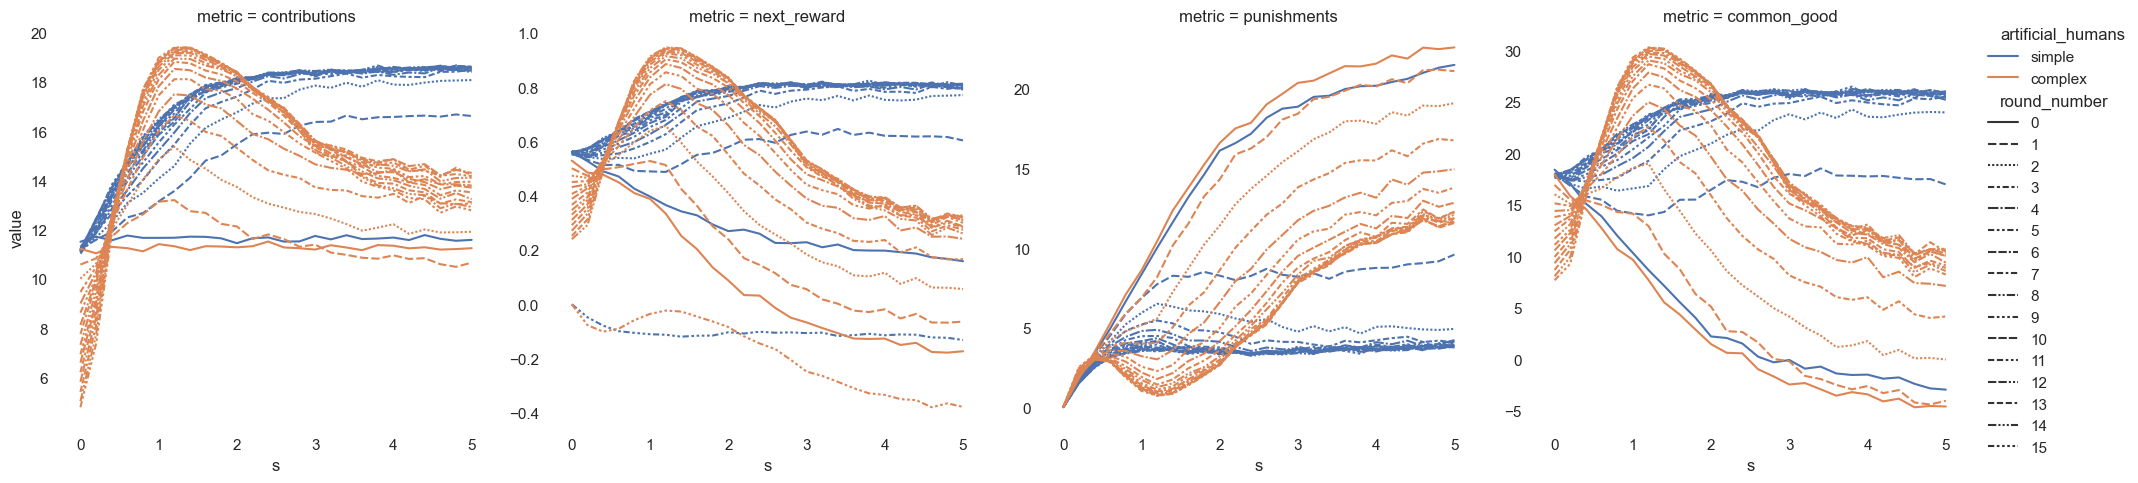

In [144]:
metrics = ['common_good', 'contributor_payoff', 'punishments', 'manager_payoff', 'next_reward', 'contributions']
metrics = ['common_good', 'punishments', 'next_reward', 'contributions']

focus = 's'

dfs = df.copy()

w = df['metric'].isin(metrics)

df = df[w]

sns.relplot(data=df, x=focus, y='value', col='metric', hue='artificial_humans', style='round_number', ci=None, facet_kws={'sharey': False, 'sharex': True}, kind='line')

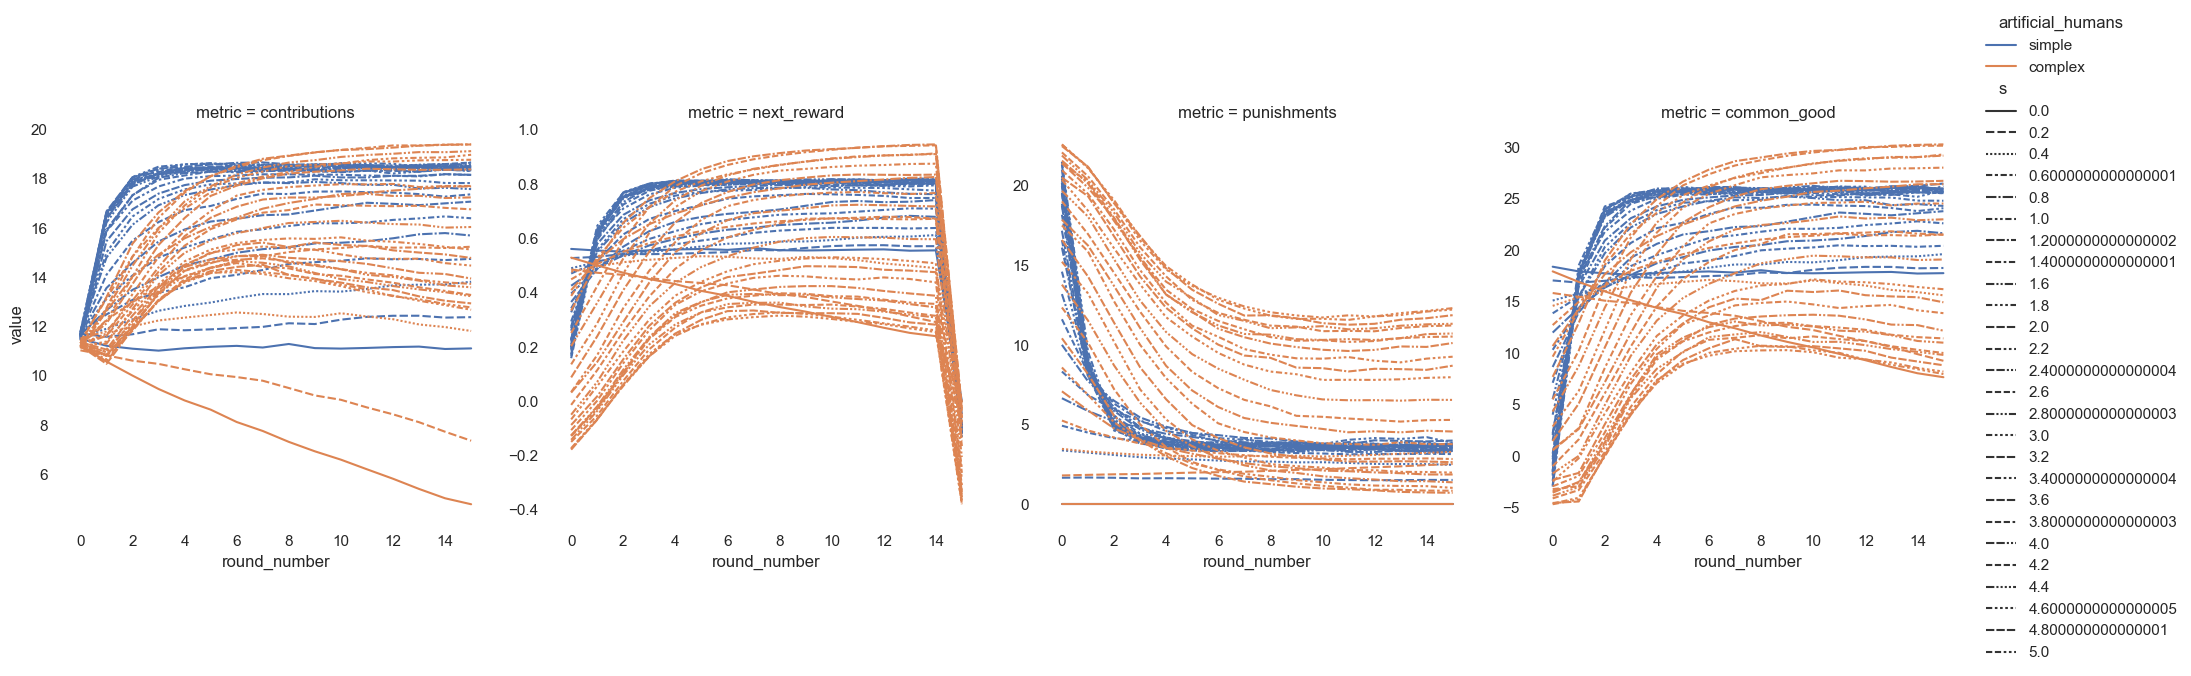

In [142]:
metrics = ['common_good', 'contributor_payoff', 'punishments', 'manager_payoff', 'next_reward', 'contributions']

focus = 's'

dfs = df.copy()

w = df['metric'].isin(metrics)

df = df[w]

sns.relplot(
    data=df, x='round_number', y='value', col='metric', hue='artificial_humans', 
    style='s', ci=None, facet_kws={'sharey': False, 'sharex': True}, 
    kind='line')